In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [24]:
working_dir = '/ninod/baird/cmip5/cmip5_calculations/attribution_2017/storm_counting/'
threshold='0.1'
threshold='0.5'
threshold='1.0'

dict_hist = numpy.load(working_dir + 'storm_counting_historical_dictionary_1981-2000_threshold_'+threshold+'mmday.npy').item()
dict_rcp85 = numpy.load(working_dir + 'storm_counting_rcp85_dictionary_2081-2100_threshold_'+threshold+'mmday.npy').item()

dict_hist.keys()

dict_keys(['storm_magnitude_list', 'storm_count_list', 'storm_length_list'])

In [25]:
storm_length_list_hist = numpy.array(dict_hist['storm_length_list'])
storm_magnitude_list_hist = numpy.array(dict_hist['storm_magnitude_list'])
storm_count_list_hist = numpy.array(dict_hist['storm_count_list'])

storm_length_list_rcp85 = numpy.array(dict_rcp85['storm_length_list'])
storm_magnitude_list_rcp85 = numpy.array(dict_rcp85['storm_magnitude_list'])
storm_count_list_rcp85 = numpy.array(dict_rcp85['storm_count_list'])

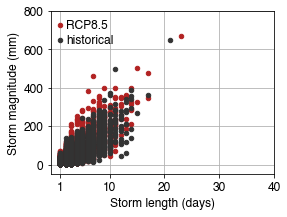

In [26]:
fontsize=12

fig = mp.figure(figsize=(4,3))

ax = fig.add_subplot(111)
ax.scatter(storm_length_list_rcp85, storm_magnitude_list_rcp85, s=20, c='firebrick', label='RCP8.5')
ax.scatter(storm_length_list_hist, storm_magnitude_list_hist, s=20, c='0.2', label='historical')
ax.set_xlabel('Storm length (days)', fontsize=fontsize)
ax.set_ylabel('Storm magnitude (mm)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.grid()
ax.set_xticks([1,10,20,30,40])
ax.set_axisbelow(True)
ax.set_ylim(-50,800)
ax.set_xlim(-0.75,40)
#ax.text(s='All members (1981-2000)', x=0, y=1.05, transform=ax.transAxes, fontsize=fontsize)

handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.03,0.97), \
          bbox_transform=ax.transAxes, loc='upper left', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

mp.savefig('figs/magnitude_vs_length_historical_and_rcp85_threshold_'+threshold+'mmday.pdf', transparent=True, bbox_inches='tight')

### Create histogram for event sizes

In [27]:
#bins = numpy.logspace(-2,numpy.log10(PRECT_ONDJFM_CA.max()),100) # log spaced bins
bins = numpy.linspace(0,600,100)
bins = numpy.logspace(-10,numpy.log10(storm_magnitude_list_hist.max()),200) # log spaced bins
hist_histogram, bin_edges = numpy.histogram(storm_magnitude_list_hist, bins=bins, density=False)
hist_bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
hist_bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

In [28]:
#bins = numpy.linspace(0,600,100)
bins = numpy.logspace(-10,numpy.log10(storm_magnitude_list_hist.max()),200)
rcp_histogram, bin_edges = numpy.histogram(storm_magnitude_list_rcp85, bins=bins, density=False)
rcp_bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
rcp_bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

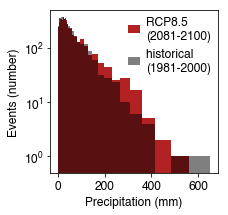

In [31]:
fig = mp.figure(figsize=(3,3))
fontsize=12

ax = fig.add_subplot(111)

bar1 = ax.bar(rcp_bin_centers, rcp_histogram, align='center', width=hist_bin_width, color='firebrick', label='RCP8.5 \n(2081-2100)')
bar2 = ax.bar(hist_bin_centers, hist_histogram, align='center', width=hist_bin_width, color='0', linewidth=0, label='historical \n(1981-2000)', alpha=0.5)
#ax.step(bin_centers, hist_histogram, where='mid',color='0')
#ax.scatter(rcp_bin_centers, rcp_histogram, color='firebrick', label='RCP8.5')

#import pprint
#pprint.pprint(vars(bar1))
#for i in bar1.patches:
#    i.set_edgecolor('None')
#ax.set_xlim(bins[0], bins[-1])

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Events (number)', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

ax.set_ylim(0.5,500)
ax.minorticks_off()
#ax.grid()
#ax.set_axisbelow(True)

handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, bbox_to_anchor=(0.98,0.98), bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.5, fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, handletextpad=0.5, handlelength=1)

mp.savefig('figs/histogram_event_numbers_rcp85_vs_historical_threshold_'+threshold+'mmday.pdf', transparent=True, bbox_inches='tight')

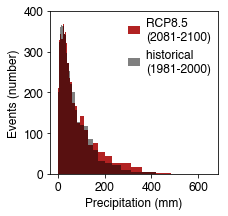

In [32]:
fig = mp.figure(figsize=(3,3))
fontsize=12

ax = fig.add_subplot(111)

bar1 = ax.bar(rcp_bin_centers, rcp_histogram, align='center', width=hist_bin_width, color='firebrick', label='RCP8.5 \n(2081-2100)')
bar2 = ax.bar(hist_bin_centers, hist_histogram, align='center', width=hist_bin_width, color='0', linewidth=0, label='historical \n(1981-2000)', alpha=0.5)
#ax.step(bin_centers, hist_histogram, where='mid',color='0')
#ax.scatter(rcp_bin_centers, rcp_histogram, color='firebrick', label='RCP8.5')

#import pprint
#pprint.pprint(vars(bar1))
#for i in bar1.patches:
#    i.set_edgecolor('None')
#ax.set_xlim(bins[0], bins[-1])

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Events (number)', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm)', fontsize=fontsize)
#ax.set_yscale('log') # 'symlog'
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

ax.set_ylim(0.5,400)
ax.minorticks_off()
#ax.grid()
#ax.set_axisbelow(True)

handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, bbox_to_anchor=(0.98,0.98), bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.5, fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, handletextpad=0.5, handlelength=1)

mp.savefig('figs/histogram_event_numbers_rcp85_vs_historical_threshold_'+threshold+'mmday_linear_yaxis.pdf', transparent=True, bbox_inches='tight')